In [8]:
# 0. SETUP: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno

# 0.1. Load Data (Upload from your local machine)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Crop_recommendation.csv')  # Ensure filename matches

# 0.2. Display first few rows
display(df.head())


Saving Crop_recommendation.csv to Crop_recommendation (4).csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Missing Values per column:
N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
label            0
label_encoded    0
N_P_ratio        0
temp_humid       0
dtype: int64


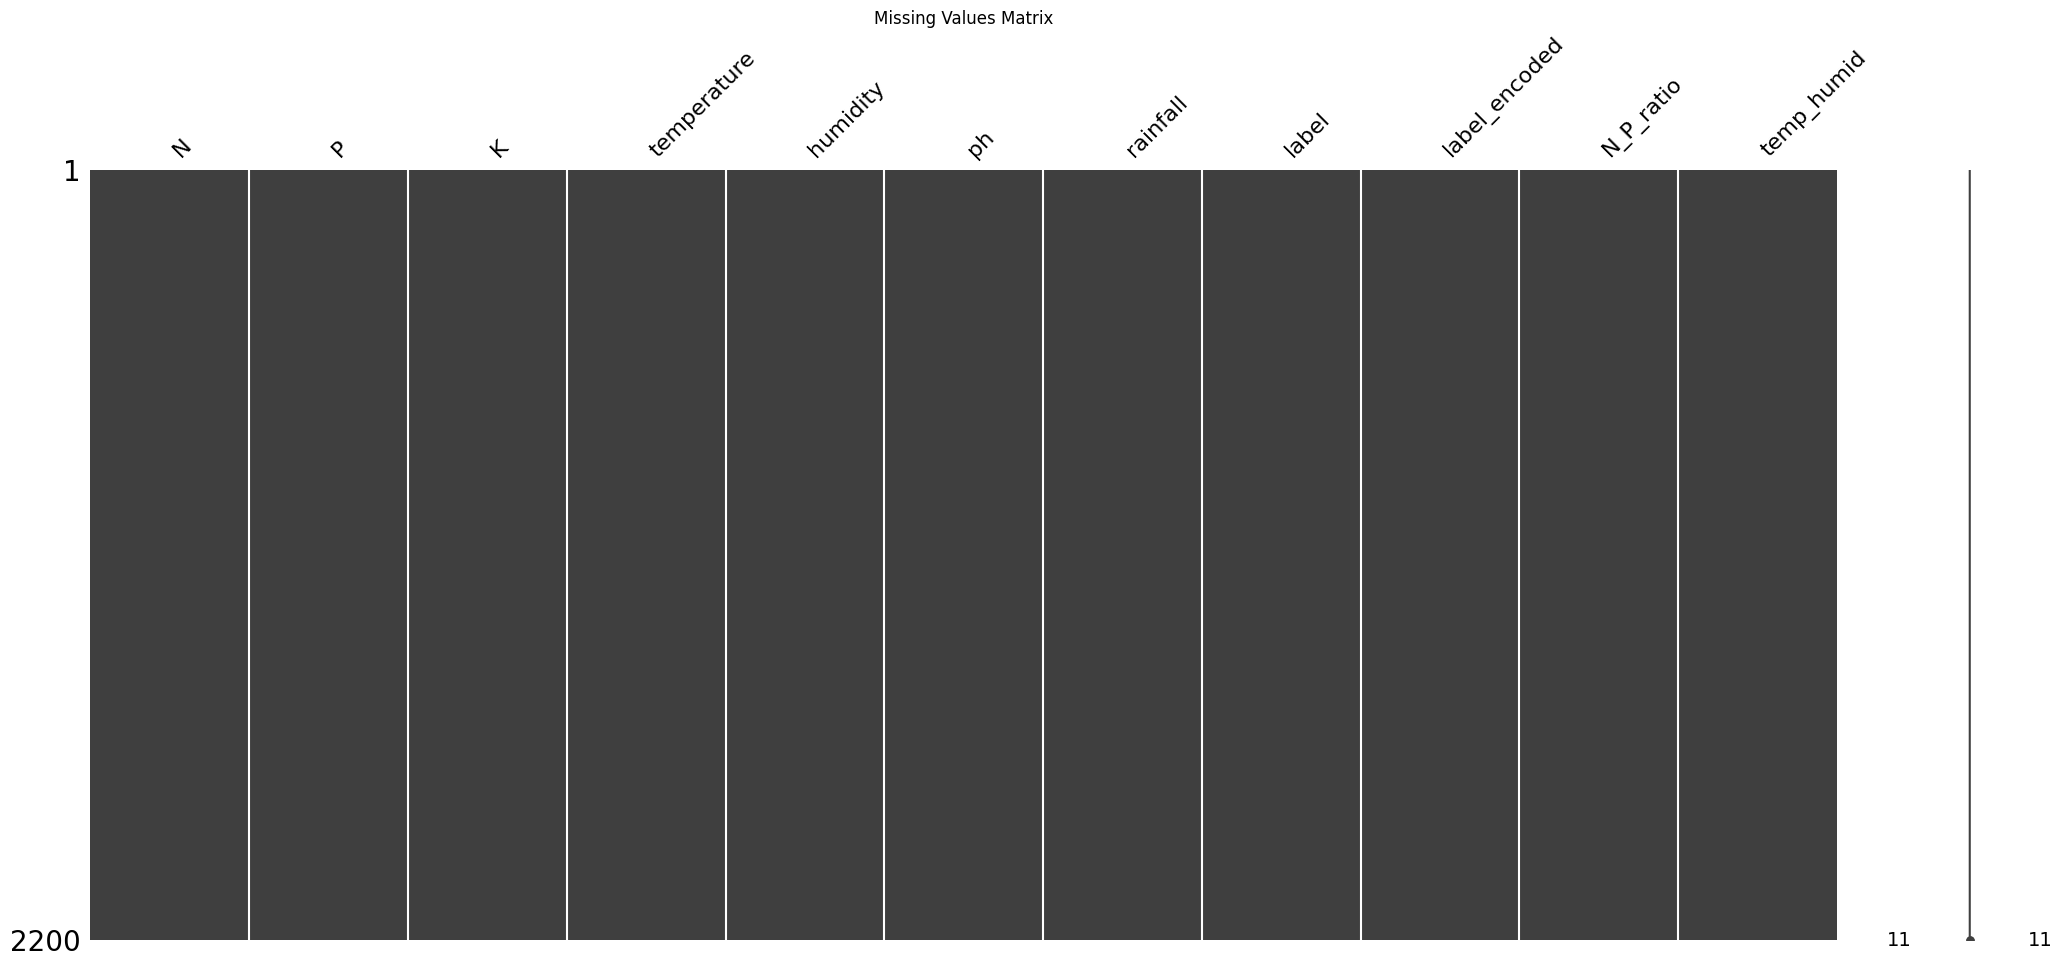

In [14]:
# Code to check and visualize missing values
print("Missing Values per column:")
print(df.isnull().sum())  # Counts missing values per column
msno.matrix(df)  # Visual representation of missing data
plt.title('Missing Values Matrix')
plt.show()


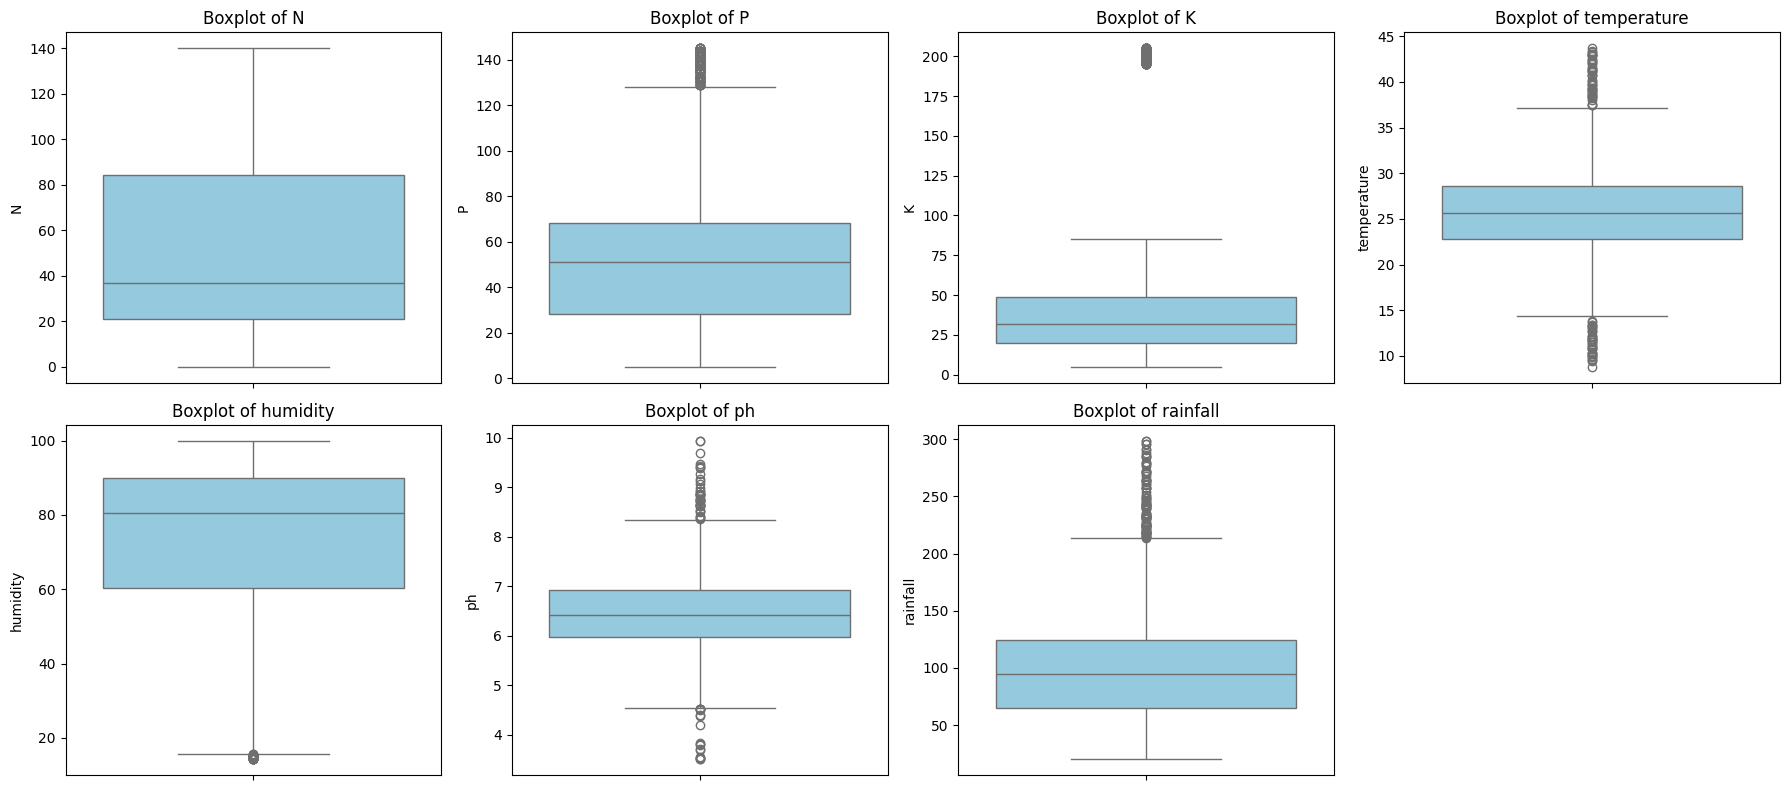

Outlier count per feature:
 N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


In [15]:
# Code to detect outliers using boxplots and IQR method
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Boxplots
plt.figure(figsize=(18,8))
for i, col in enumerate(num_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# IQR Calculation
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outlier count per feature:\n", outliers)


In [16]:
# Code for interactive visualizations
fig = px.scatter_matrix(df, dimensions=num_cols, color='label', height=900)  # Pairwise relationships
fig.update_traces(diagonal_visible=False)
fig.show()

fig = px.histogram(df, x='label', color='label', title='Crop Distribution', width=900)  # Crop frequency
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [17]:
# Code for preprocessing
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])  # Convert crop names to numbers

X = df[num_cols]
y = df['label_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


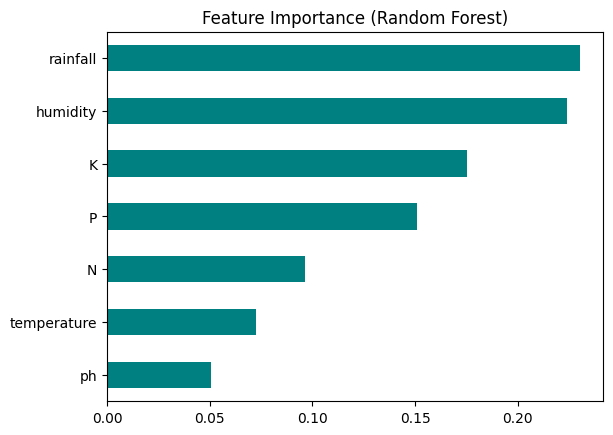

In [18]:
# Code for feature engineering
df['N_P_ratio'] = df['N'] / (df['P'] + 1e-5)  # Prevent division by zero
df['temp_humid'] = df['temperature'] * df['humidity']

# Feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=num_cols)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance (Random Forest)')
plt.show()


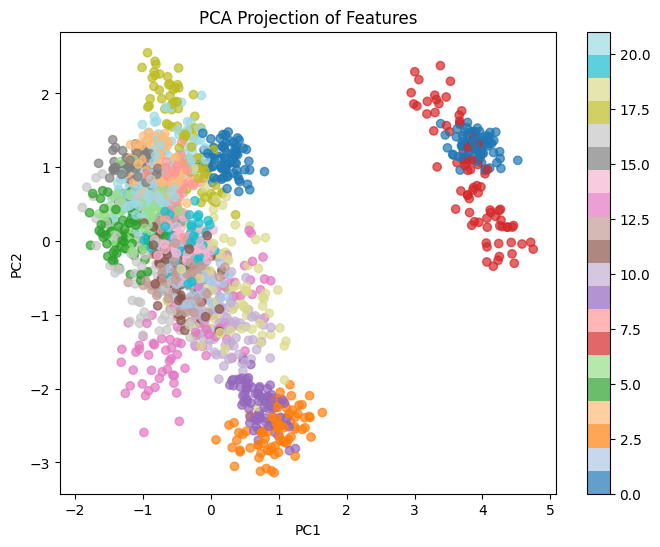

In [19]:
# Code for PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='tab20', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Features')
plt.colorbar()
plt.show()


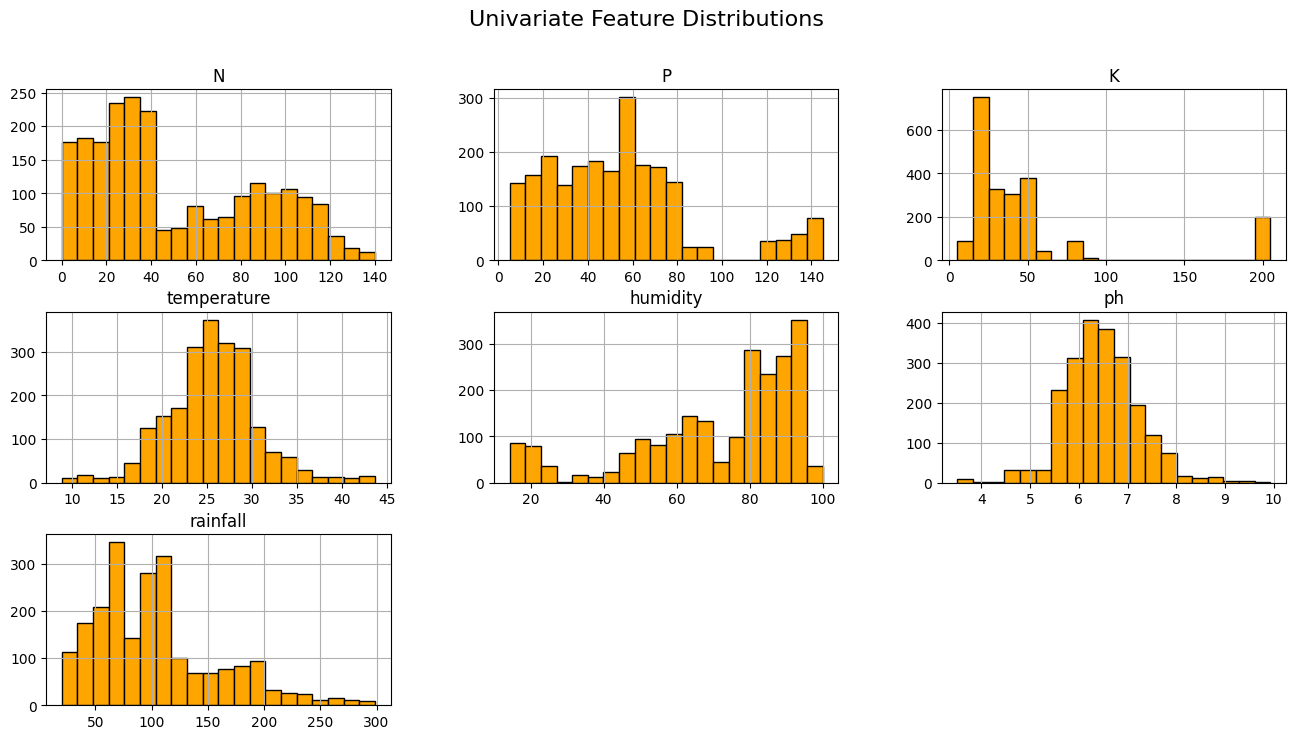

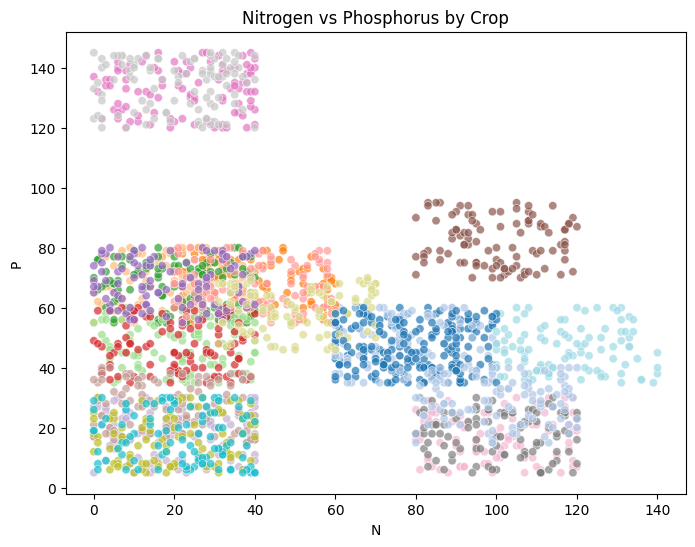

In [20]:
# Code for distribution analysis
df[num_cols].hist(figsize=(16,8), bins=20, color='orange', edgecolor='black')  # Univariate
plt.suptitle('Univariate Feature Distributions', fontsize=16)
plt.show()

# Bivariate example
plt.figure(figsize=(8,6))
sns.scatterplot(x='N', y='P', hue='label', data=df, palette='tab20', alpha=0.7, legend=False)
plt.title('Nitrogen vs Phosphorus by Crop')
plt.show()


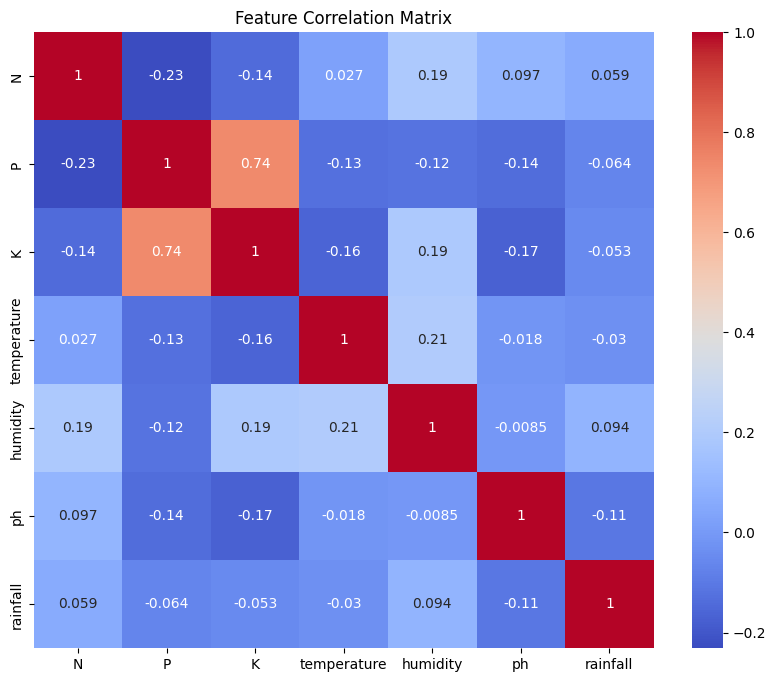

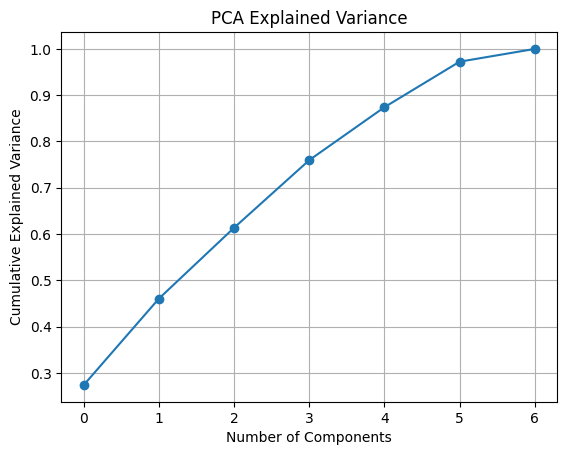

In [21]:
# Code for correlation and dimensionality reduction
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')  # Correlation matrix
plt.title('Feature Correlation Matrix')
plt.show()

# PCA variance
pca_full = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


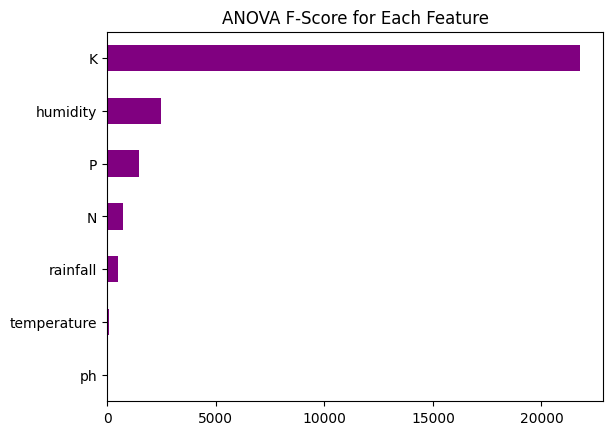

In [22]:
# Code for ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = pd.Series(selector.scores_, index=num_cols)
scores.sort_values().plot(kind='barh', color='purple')
plt.title('ANOVA F-Score for Each Feature')
plt.show()


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
    

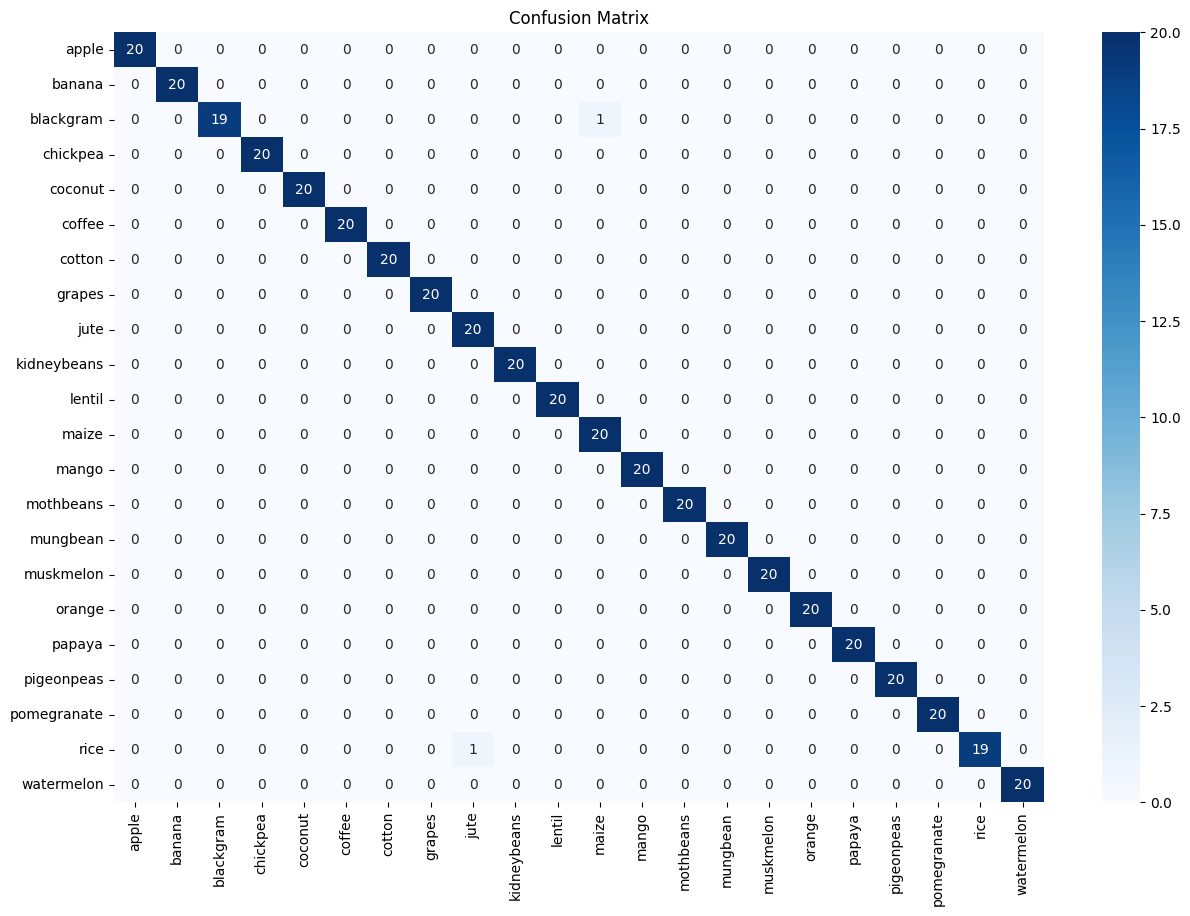

In [23]:
# Code for final model evaluation
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train_scaled, y_train)

# Classification report
y_pred = rf_final.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Cross-validation
scores = cross_val_score(rf_final, X_train_scaled, y_train, cv=5)
print(f"Cross-validation Accuracy: {scores.mean():.2f} (±{scores.std():.2f})")

# Confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
